<a href="https://colab.research.google.com/github/RosaGaLl/Data-Science-III/blob/main/Data_science_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST digits classification dataset**


## **1. Descripción del problema de negocio**

El presente dataset recopila las opiniones de los usuarios sobre películas, las cuales pueden influir considerablemente en las decisiones de otros usuarios al momento de elegir una película nueva.Puesto que, si ahondamos más en estas reseñas podemos deducir que contienen valiosos sentimientos que reflejan la opinión de los espectadores.

Considerando ello, el contar con un sistema automático de análisis de sentimientos puede ayudar a plataformas de streaming, productoras o sitios de críticas a conocer la percepción general del público ante las películas vistas. Asimismo, el poder analizar estos textos y clasificarlos como positivos o negativos permite a estas mismas empresas entender mejor la recepción de los productos cinematográficos que se ofrecen, incluso se podrían ajustar estrategias de marketing o incluso ayudar a sus sistemas de recomendación.

## **2. Objetivo general**

El objetivo general de este proyecto es poder construir y mejorar
una red neuronal profunda que permita clasificar automáticamente las reseñas de películas como positivas o negativas, utilizando el dataset.
Y para ello, se usarán técnicas de Deep Learning aplicadas a Procesamiento de Lenguaje Natural (NLP), lo que permitirá que sea posible poder automatizar los análisis de los comentarios de las películas.

## **3.Origen de los datos**

El dataset a usar se encuentra disponible directamente en Keras.Este contiene 25000 reseñas de entrenamiento y 25000 de prueba, etiquetadas como positivas = 1 o negativas =0. Las reseñas ya están preprocesadas y tokenizadas como secuencias de índices de palabras, lo cual nos permite obtener un análisis más detallado.

## **4. Definición de las variables**



*   x_train, x_test: Listas de secuencias de enteros, donde cada entero representa una palabra
*   y_train, y_test: Listas de etiquetas binarias las cuales son: 0 = negativo y 1 = positivo
*   num_words: Número de palabras más frecuentes que se conservarán en el vocabulario.
*   Longitud de las secuencias: Se da a conocer un maxlen para uniformar la longitud de entrada.
*  Las reseñas se encuentran tokenizadas



## **5.Librerías a usar en el proyecto**

Instalación de Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer




## **6.Desarrollo**

**a) Carga del dataset**

In [2]:
#Se carga el dataset con solo las 10000 palabras más frecuentes para tener un análisis más profundo y detallado
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


# Es la longitud máxima de secuencia de las reseñas que se tienen
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**b) Análisis exploratorio del dataset**

Se conoce la reseña del dataset, la cual pasará a ser procesada mostrando a los datos en su forma numérica codificada.

In [8]:
word_index = imdb.get_word_index()
index_from = 3
word_index = {k:(v+index_from) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<OOV>"] = 2
reverse_index = {v:k for k,v in word_index.items()}
decoded_review = ' '.join([reverse_index.get(i, "?") for i in x_train[0]])
print(decoded_review)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
and you could just imagine being there robert <OOV> is an amazing actor and now the same being director <OOV> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <OOV> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <OOV> to the two little boy's that played the <OOV> of norman and paul they were just brilliant children are often left out of the <OOV> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it w

In [4]:
#Información que se tiene del dataset
print(f"Número de reseñas de entrenamiento: {len(x_train)}")
print(f"Número de reseñas de prueba: {len(x_test)}")
print(f"Longitud media de las reseñas: {np.mean([len(x) for x in x_train]):.2f}")
print(f"Distribución de clases en entrenamiento: {np.unique(y_train, return_counts=True)}")


Número de reseñas de entrenamiento: 25000
Número de reseñas de prueba: 25000
Longitud media de las reseñas: 200.00
Distribución de clases en entrenamiento: (array([0, 1]), array([12500, 12500]))


Se muestra que en el dataset:
1.Las clases están balanceadas en 50% positivas y 50% negativas.
2.Las reseñas tienen longitudes variadas.
3.Solo las 10000 palabras más frecuentes se usan para reducir complejidad de análisis.

*Se puede mostrar un ejemplo de las reseñas en la siguiente información*

In [6]:
print(f"Ejemplo de reseña (como secuencia de índices):\n{x_train[0]}")
print(f"Etiqueta (0=negativa, 1=positiva): {y_train[0]}")


Ejemplo de reseña (como secuencia de índices):
[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283

**c) Desarrollo de la red neuronal**

Se muestra la red neuronal para clasificación binaria

In [ ]:
model = keras.Sequential([
keras.layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
keras.layers.Flatten(),
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')  # Salida binaria
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Se empieza a definir la arquitectura del modelo con capas adicionales, se usa la capa convolucional para captar patrones locales,capa densa y la capa de salida binaria
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64),  # capa recurrente
    Dense(1, activation='sigmoid')
])

# Se compila el modelo para entrenar la red neuronal
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 161ms/step - accuracy: 0.7146 - loss: 0.5425 - val_accuracy: 0.8678 - val_loss: 0.3158
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.9053 - loss: 0.2398 - val_accuracy: 0.8700 - val_loss: 0.3121
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 158ms/step - accuracy: 0.9299 - loss: 0.1961 - val_accuracy: 0.8426 - val_loss: 0.3696


Se usa en el entrenamiento un validation_split=0.2 porque se usará solo el 20% del entrenamiento para la validación

**d) Evaluación**

Se sigue con la evaluación en el conjunto de test

In [ ]:
results = model.evaluate(x_test, y_test)
print(f"Precisión en test: {results[1]*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8647 - loss: 0.3410
Precisión en test: 86.66%


**e) Visualización**

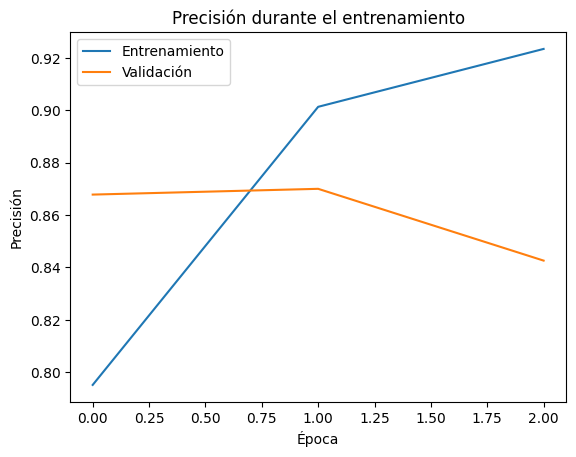

In [5]:
# Se presenta mediante los gráficos el rendimiento del entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

Se analiza del gráfico que:
1. La precisión en el entrenamiento:
 Se aumenta consistentemente de aprox 80 % a más de 92%, lo cual es esperado ya que el modelo va aprendiendo sobre los datos de entrenamiento.
2. Precisión en validación:
 Esta se estabiliza y luego disminuye, puesto que indica que el modelo empieza a sobreajustarse o overfitting a partir de la 3ra época.

Lo que se concluiría en que el modelo aprende bien los datos de entrenamiento, pero al parecer pierde capacidad de generalizar datos nuevos.

## **7. Profundización en Deep Learning**

Se agregan más capas como el Dropout para regularización, una capa Conv1D en conjunto con maxPooling y mayor número de unidades en LSTM. Como se observa a continuación:

In [ ]:
model_dl = Sequential([
Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
Conv1D(64, 5, activation='relu'),
MaxPooling1D(pool_size=2),
LSTM(64, dropout=0.2, recurrent_dropout=0.2),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')
])


model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history_dl = model_dl.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)



Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 180ms/step - accuracy: 0.6531 - loss: 0.5864 - val_accuracy: 0.8658 - val_loss: 0.3518
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.8986 - loss: 0.2771 - val_accuracy: 0.8652 - val_loss: 0.3263
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 182ms/step - accuracy: 0.9337 - loss: 0.1911 - val_accuracy: 0.8780 - val_loss: 0.2987
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.9607 - loss: 0.1256 - val_accuracy: 0.8750 - val_loss: 0.3665
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 193ms/step - accuracy: 0.9703 - loss: 0.0939 - val_accuracy: 0.8718 - val_loss: 0.3806


Se determina o concluye que la precisión de entrenamiento sigue subiendo,en el caso de la precisión de validación esta se estanca e incluso baja levemente.
Lo cual, nos confirma el sobreajuste; es decir ; el modelo está memorizando los datos de entrenamiento, no aprendiendo patrones generalizables.





***Comparación de resultados***

In [ ]:
loss_base, acc_base = model.evaluate(x_test, y_test)
loss_dl, acc_dl = model_dl.evaluate(x_test, y_test)
print(f"Modelo sencillo - Precisión: {acc_base*100:.2f}%")
print(f"Modelo mejorado - Precisión: {acc_dl*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8647 - loss: 0.3410
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8528 - loss: 0.4880
Modelo sencillo - Precisión: 86.66%
Modelo mejorado - Precisión: 85.54%


Los resultados obtenidos fueron los siguientes:
Modelo sencillo - Precisión: 86.66%
Modelo mejorado - Precisión: 85.54%

## **8. Conclusiones**


1. El modelo al ser más complejo no necesariamente nos resultó siendo el mejor.
2. A pesar de contar con el modelo mejorado con mayor profundidad , al usar capas comos Conv1D ,LSTM y capas densas, no ayudó a generalizar mejor que el modelo sencillo.
3. Se construyó un modelo de red neuronal profunda utilizando capas Embedding, Conv1D, MaxPooling, LSTM y Dense.
4. Aunque el modelo más profundo mostró una alta precisión en entrenamiento con un 97%, la precisión en validación se estabilizó y luego descendió de un 87.8% a 87.1%, lo que indicó un sobreajuste.
5. Al comparar con un modelo sencillo es decir,solo capa de embedding y capa densa, se observó que este último obtiene ligeramente mejor precisión en test
 con un 86.66% que el modelo complejo con un 85.54%.Indicando que la mayor complejidad no implicó un mejor rendimiento, y más si no se controla el sobreajuste.
